In [4]:
import pandas as pd
import numpy as np
df = pd.read_excel('经纬度+scene.xlsx')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6273 entries, 0 to 6272
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   a.user_id           6273 non-null   object 
 1   a.credit_apply_id   6273 non-null   object 
 2   a.apply_status      6273 non-null   int64  
 3   a.apply_start_time  6273 non-null   object 
 4   a.product_no        6273 non-null   object 
 5   a.product_id        6273 non-null   object 
 6   a.rn                6273 non-null   int64  
 7   _c1                 6273 non-null   object 
 8   b.devicetype        6267 non-null   object 
 9   b.devicebrand       6267 non-null   object 
 10  b.scene             6273 non-null   object 
 11  b.location_lat      5797 non-null   float64
 12  b.location_lng      5797 non-null   float64
 13  b.dt                6273 non-null   object 
 14  b.createtime        6273 non-null   object 
dtypes: float64(2), int64(2), object(11)
memory usage: 735.2

In [14]:
#df1 = df[~df['b.devicetype'].isin(['OFFLINE_PAD'])]
#df1['b.scene'].value_counts()
'''
OFFLINE_APP_LOGIN                 1737
OFFLINE_FACE_VERIFIED              490
OFFLINE_APP_SUBMIT_CREDIT_INFO     419
OFFLINE_SAVE_CREDIT_DATA           396
OFFLINE_SET_TRADE_PASSWORD         370
OFFLINE_SUBMIT_LOAN_APPLY          128
PAY_PWD_ERROR_FOR_LOAN               6
OFFLINE_PRE_LOAN_DEVICE              3
OFFLINE_RETRIEVE_PASSWORD            3
OFFLINE_CHANGE_LOGIN_PASSWORD        1
Name: b.scene, dtype: int64
'''

In [18]:
df = df[~df['b.devicetype'].isin(['OFFLINE_PAD'])]
df = df.dropna()

In [30]:
#地址筛选

#采集poi
import time
import json
import requests
import re
from bs4 import BeautifulSoup


def get_loc(data):
    inputAddress = data['home ad']
    loc = []
    bases = r'https://restapi.amap.com/v3/place/text?keywords='+inputAddress+'&city=&output=xml&key=1b0824e1786ded987922abb28c859c44&extensions=all'
    for base in bases:
        try:
            response = requests.get(base)
            soupi = BeautifulSoup(response.text,'lxml')
            loc.append(soupi.find("pois").text)
            print('成功采集一条位置数据,共采集%i'%(len(loc)))
        except:
            try:
                response = requests.get(base)
                soupi = BeautifulSoup(response.text,'lxml')
                loc.append(soupi.find("pois").text)
                print('成功采集一条位置数据,共采集%i'%(len(loc)))
            except:
                print('未成功采集两次，未成功采集的网址为',base)
                loc.append(np.nan)
    return loc

if __name__ == "__main__":
#注意改路径
    data = pd.read_csv(r'C:\Users\cc\Documents\经纬度地址匹配\Clients_address.csv')
    data_use = data
    POITYPE = get_loc(data_use)
    data_use['POI'] =  POITYPE
    data_use.to_csv('地点POIv2.csv',encoding='utf-8-sig')

成功采集一条位置数据,共采集1
成功采集一条位置数据,共采集2
成功采集一条位置数据,共采集3
成功采集一条位置数据,共采集4
成功采集一条位置数据,共采集5
成功采集一条位置数据,共采集6
成功采集一条位置数据,共采集7
成功采集一条位置数据,共采集8
成功采集一条位置数据,共采集9
成功采集一条位置数据,共采集10
成功采集一条位置数据,共采集11
成功采集一条位置数据,共采集12
成功采集一条位置数据,共采集13
成功采集一条位置数据,共采集14
成功采集一条位置数据,共采集15
成功采集一条位置数据,共采集16
成功采集一条位置数据,共采集17
成功采集一条位置数据,共采集18
成功采集一条位置数据,共采集19
成功采集一条位置数据,共采集20
成功采集一条位置数据,共采集21
成功采集一条位置数据,共采集22
成功采集一条位置数据,共采集23
成功采集一条位置数据,共采集24
成功采集一条位置数据,共采集25
成功采集一条位置数据,共采集26
成功采集一条位置数据,共采集27
成功采集一条位置数据,共采集28
成功采集一条位置数据,共采集29
成功采集一条位置数据,共采集30
成功采集一条位置数据,共采集31
成功采集一条位置数据,共采集32
成功采集一条位置数据,共采集33
成功采集一条位置数据,共采集34
成功采集一条位置数据,共采集35
成功采集一条位置数据,共采集36
成功采集一条位置数据,共采集37
成功采集一条位置数据,共采集38
成功采集一条位置数据,共采集39
成功采集一条位置数据,共采集40
成功采集一条位置数据,共采集41
成功采集一条位置数据,共采集42
成功采集一条位置数据,共采集43
成功采集一条位置数据,共采集44
成功采集一条位置数据,共采集45
成功采集一条位置数据,共采集46
成功采集一条位置数据,共采集47
成功采集一条位置数据,共采集48
成功采集一条位置数据,共采集49
成功采集一条位置数据,共采集50
成功采集一条位置数据,共采集51
成功采集一条位置数据,共采集52
成功采集一条位置数据,共采集53
成功采集一条位置数据,共采集54
成功采集一条位置数据,共采集55
成功采集一条位置数据,共采集56
成功采集一条位置数据,共采集57
成功采集一条位置数据,共采集58
成功采集一条位置数据,共采集59
成功采集一条

In [31]:
df2 = pd.read_csv('地点POIv2.csv')

In [35]:
df2['type'] = df2['POI'].str.split(';',expand=True)[1]
''''
住宅区          98
交通地名         57
普通地名         53
学校           30
门牌信息         23
政府机关         15
商务住宅相关        9
便民商店/便利店      7
公交车站          7
科教文化场所        7
临街院门          7
公司            6
生活服务场所        6
公检法机构         5
服装鞋帽皮具店       5
中餐厅           4
综合医院          4
综合市场          3
邮局            3
医疗保健服务场所      3
地名地址信息        3
专卖店           2
宾馆酒店          2
银行            2
物流速递          2
商场            2
诊所            2
工厂            1
停车场           1
公司企业          1
电讯营业厅         1
自动提款机         1
美容美发店         1
加油站           1
家居建材市场        1
专科医院          1
快餐厅           1
家电电子卖场        1
楼宇            1
购物相关场所        1
疾病预防机构        1
汽车维修          1
公园广场          1
超级市场          1
个人用品/化妆品店     1
Name: type, dtype: int64
''

In [39]:
df3 = df2[df2['type'].isin(['住宅区' or '商务住宅相关'])]
#98个用户留存

In [57]:
dfm = pd.merge(df,df3,how = "inner",right_on=['user_id(md5)'],left_on=['_c1'])

In [67]:
dfm['_c1'].nunique()

91

In [70]:
dfm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 732 entries, 0 to 731
Data columns (total 30 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   a.user_id           732 non-null    object 
 1   a.credit_apply_id   732 non-null    object 
 2   a.apply_status      732 non-null    int64  
 3   a.apply_start_time  732 non-null    object 
 4   a.product_no        732 non-null    object 
 5   a.product_id        732 non-null    object 
 6   a.rn                732 non-null    int64  
 7   _c1                 732 non-null    object 
 8   b.devicetype        732 non-null    object 
 9   b.devicebrand       732 non-null    object 
 10  b.scene             732 non-null    object 
 11  b.location_lat      732 non-null    float64
 12  b.location_lng      732 non-null    float64
 13  b.dt                732 non-null    object 
 14  b.createtime        732 non-null    object 
 15  Unnamed: 0          732 non-null    int64  
 16  居住省份    

In [71]:
#地址转化为坐标
def get_loc(data):
    mc = data['home ad']
    location1 = mc
    loc = []
    bases = r"https://restapi.amap.com/v3/geocode/geo?address="+location1+"&output=XML&key=1b0824e1786ded987922abb28c859c44"
    for base in bases:
        try:
            response = requests.get(base)
            soupi = BeautifulSoup(response.text,'lxml')
            loc.append(soupi.find('location').text)
            print('成功采集一条位置数据,共采集%i'%(len(loc)))
        except:
            try:
                response = requests.get(base)
                soupi = BeautifulSoup(response.text,'lxml')
                loc.append(soupi.find('location').text)
                print('成功采集一条位置数据,共采集%i'%(len(loc)))
            except:
                print('未成功采集两次，未成功采集的网址为',base)
                loc.append(np.nan)
    return loc

if __name__ == "__main__":
    data = dfm
    data_use = data
    locationplus = get_loc(data_use)
    data_use['g&t'] = locationplus
    data_use['t_lng'] = data_use['g&t'].str.split(',').str[0]
    data_use['t_lat'] = data_use['g&t'].str.split(',').str[1]
    data_use.to_csv(r'C:\Users\cc\Documents\经纬度地址匹配\data+addresslng&lat.csv',encoding='utf-8-sig')

成功采集一条位置数据,共采集1
成功采集一条位置数据,共采集2
成功采集一条位置数据,共采集3
成功采集一条位置数据,共采集4
成功采集一条位置数据,共采集5
成功采集一条位置数据,共采集6
成功采集一条位置数据,共采集7
成功采集一条位置数据,共采集8
成功采集一条位置数据,共采集9
成功采集一条位置数据,共采集10
成功采集一条位置数据,共采集11
成功采集一条位置数据,共采集12
成功采集一条位置数据,共采集13
成功采集一条位置数据,共采集14
成功采集一条位置数据,共采集15
成功采集一条位置数据,共采集16
成功采集一条位置数据,共采集17
成功采集一条位置数据,共采集18
成功采集一条位置数据,共采集19
成功采集一条位置数据,共采集20
成功采集一条位置数据,共采集21
成功采集一条位置数据,共采集22
成功采集一条位置数据,共采集23
成功采集一条位置数据,共采集24
成功采集一条位置数据,共采集25
成功采集一条位置数据,共采集26
成功采集一条位置数据,共采集27
成功采集一条位置数据,共采集28
成功采集一条位置数据,共采集29
成功采集一条位置数据,共采集30
成功采集一条位置数据,共采集31
成功采集一条位置数据,共采集32
成功采集一条位置数据,共采集33
成功采集一条位置数据,共采集34
成功采集一条位置数据,共采集35
成功采集一条位置数据,共采集36
成功采集一条位置数据,共采集37
成功采集一条位置数据,共采集38
成功采集一条位置数据,共采集39
成功采集一条位置数据,共采集40
成功采集一条位置数据,共采集41
成功采集一条位置数据,共采集42
成功采集一条位置数据,共采集43
成功采集一条位置数据,共采集44
成功采集一条位置数据,共采集45
成功采集一条位置数据,共采集46
成功采集一条位置数据,共采集47
成功采集一条位置数据,共采集48
成功采集一条位置数据,共采集49
成功采集一条位置数据,共采集50
成功采集一条位置数据,共采集51
成功采集一条位置数据,共采集52
成功采集一条位置数据,共采集53
成功采集一条位置数据,共采集54
成功采集一条位置数据,共采集55
成功采集一条位置数据,共采集56
成功采集一条位置数据,共采集57
成功采集一条位置数据,共采集58
成功采集一条位置数据,共采集59
成功采集一条

成功采集一条位置数据,共采集463
成功采集一条位置数据,共采集464
成功采集一条位置数据,共采集465
成功采集一条位置数据,共采集466
成功采集一条位置数据,共采集467
成功采集一条位置数据,共采集468
成功采集一条位置数据,共采集469
成功采集一条位置数据,共采集470
成功采集一条位置数据,共采集471
成功采集一条位置数据,共采集472
成功采集一条位置数据,共采集473
成功采集一条位置数据,共采集474
成功采集一条位置数据,共采集475
成功采集一条位置数据,共采集476
成功采集一条位置数据,共采集477
成功采集一条位置数据,共采集478
成功采集一条位置数据,共采集479
成功采集一条位置数据,共采集480
成功采集一条位置数据,共采集481
成功采集一条位置数据,共采集482
成功采集一条位置数据,共采集483
成功采集一条位置数据,共采集484
成功采集一条位置数据,共采集485
成功采集一条位置数据,共采集486
成功采集一条位置数据,共采集487
成功采集一条位置数据,共采集488
成功采集一条位置数据,共采集489
成功采集一条位置数据,共采集490
成功采集一条位置数据,共采集491
成功采集一条位置数据,共采集492
成功采集一条位置数据,共采集493
成功采集一条位置数据,共采集494
成功采集一条位置数据,共采集495
成功采集一条位置数据,共采集496
成功采集一条位置数据,共采集497
成功采集一条位置数据,共采集498
成功采集一条位置数据,共采集499
成功采集一条位置数据,共采集500
成功采集一条位置数据,共采集501
成功采集一条位置数据,共采集502
成功采集一条位置数据,共采集503
成功采集一条位置数据,共采集504
成功采集一条位置数据,共采集505
成功采集一条位置数据,共采集506
成功采集一条位置数据,共采集507
成功采集一条位置数据,共采集508
成功采集一条位置数据,共采集509
成功采集一条位置数据,共采集510
成功采集一条位置数据,共采集511
成功采集一条位置数据,共采集512
成功采集一条位置数据,共采集513
成功采集一条位置数据,共采集514
成功采集一条位置数据,共采集515
成功采集一条位置数据,共采集516
成功采集一条位置数据,共采集517
成功采集一条位置数据

In [72]:
data_use.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 732 entries, 0 to 731
Data columns (total 33 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   a.user_id           732 non-null    object 
 1   a.credit_apply_id   732 non-null    object 
 2   a.apply_status      732 non-null    int64  
 3   a.apply_start_time  732 non-null    object 
 4   a.product_no        732 non-null    object 
 5   a.product_id        732 non-null    object 
 6   a.rn                732 non-null    int64  
 7   _c1                 732 non-null    object 
 8   b.devicetype        732 non-null    object 
 9   b.devicebrand       732 non-null    object 
 10  b.scene             732 non-null    object 
 11  b.location_lat      732 non-null    float64
 12  b.location_lng      732 non-null    float64
 13  b.dt                732 non-null    object 
 14  b.createtime        732 non-null    object 
 15  Unnamed: 0          732 non-null    int64  
 16  居住省份    

In [73]:
from geopy import distance

def cal_distance(data_use):
    lon1 = data_use['b.location_lng']
    lat1 = data_use['b.location_lat']
    lon2 = data_use['t_lng']
    lat2 = data_use['t_lat']
    lonlat1 = (lat1,lon1)
    lonlat2 = (lat2,lon2)
    dist = distance.distance(lonlat1,lonlat2).km
    return dist
data_use['distance'] = data_use.apply(lambda data_use: cal_distance(data_use), axis=1)

In [75]:
data_use['distance'].describe()

count    732.000000
mean       9.587432
std       27.584875
min        0.012362
25%        1.095177
50%        1.896101
75%        5.435843
max      218.940426
Name: distance, dtype: float64

In [94]:
abc = data_use.loc[data_use['distance']<=1
                  ]

In [95]:
data_use['_c1'].nunique()

91

In [96]:
abc['_c1'].nunique()

28

In [84]:
data_use['home ad']

0      重庆市重庆市辖区沙坪坝区派出所宿舍
1      重庆市重庆市辖区沙坪坝区派出所宿舍
2      重庆市重庆市辖区沙坪坝区派出所宿舍
3          江西省吉安市吉水县城市花园
4          江西省吉安市吉水县城市花园
             ...        
727         甘肃省兰州市城关区家属院
728         甘肃省兰州市城关区家属院
729         甘肃省兰州市城关区家属院
730         甘肃省兰州市城关区家属院
731         甘肃省兰州市城关区家属院
Name: home ad, Length: 732, dtype: object

In [101]:
abc['date_formatted']=pd.to_datetime(abc['b.createtime'],format='%Y-%m-%d %H:%M:%S')

<ipython-input-101-d437c4947dea>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  abc['date_formatted']=pd.to_datetime(abc['b.createtime'],format='%Y-%m-%d %H:%M:%S')


In [104]:
abc['just_time']=abc['date_formatted'].dt.time

<ipython-input-104-4e3de0208c80>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  abc['just_time']=abc['date_formatted'].dt.time


In [105]:
abc['just_time']

3      09:52:08
4      09:56:10
5      09:54:41
6      09:55:02
7      09:56:00
         ...   
711    16:04:25
712    16:04:04
713    16:02:38
714    16:05:48
715    16:05:39
Name: just_time, Length: 160, dtype: object

In [161]:
import matplotlib.pyplot as plt

In [131]:
abc['hour_only'] = abc['date_formatted'].dt.hour

<ipython-input-131-9b46b71b7fe5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  abc['hour_only'] = abc['date_formatted'].dt.hour


In [139]:
abcd = abc.groupby(['hour_only'])

In [140]:
abcd

In [149]:
ath = abc['hour_only'].value_counts(sort=False)

In [147]:
dfm['hour_only'] = pd.to_datetime(dfm['b.createtime'],format='%Y-%m-%d %H:%M:%S').dt.hour

In [150]:
ateh = dfm['hour_only'].value_counts(sort=False)

In [151]:
ath/ateh

0     0.500000
2     0.500000
3          NaN
5          NaN
6     0.250000
7     0.142857
8     0.464286
9     0.173077
10    0.167939
11    0.273973
12    0.150000
13    0.105263
14    0.204545
15    0.037975
16    0.272727
17    0.277778
18    0.250000
19    0.500000
20    0.588235
21    0.583333
22    0.200000
23    0.857143
Name: hour_only, dtype: float64

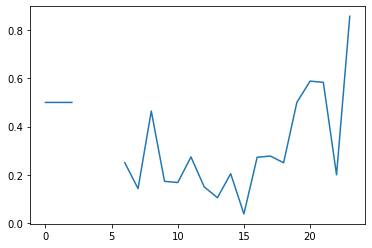

In [156]:
plt.plot(ath/ateh)

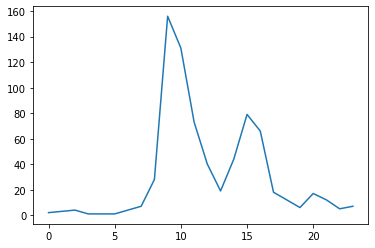

In [157]:
plt.plot(ateh)

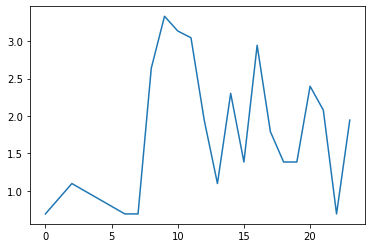

In [160]:
plt.plot(np.log1p(ath))

In [184]:
abc1 = data_use.loc[data_use['distance']>1]

In [166]:
abc1['_c1'].unique()

array(['3f59acac815e0ae7a9fcc30bd09111cb',
       '6f17bf556d539656c0326de5819f653b',
       '58ff8e761f52a90809edcc4b91d5040b',
       'e4fd52acf65c53894140b0c3e8c249e4',
       '062d733a9c0d13c999192b4acfa118ee',
       '939829ba892d138f3eb0e4c85cbaa9da',
       '33fdeacfb9024a91e3b382c9e7f24db3',
       '54d60db7a5e3b863ab23d35d53fb7b95',
       '77c2f8ab8f486d77ede42d74ae94ac59',
       '8cd03426490fc96ece68f4db42c516ed',
       'ceb6b8fefd593e5208571275b3a0fa62',
       'bdfe76052611c1f08702e0bafce9c69e',
       '0dcfdd9b23dca99a8ff4145b21dfaa37',
       '0a571809975b505d2580820ffcc3e471',
       '1ae3b7e870776f59fabf0110c9ef39b7',
       '44a8e15febd2bc92eb44e8b192b0d12c',
       'cf22f324d6d09d7d4e3bd67dc280bdd9',
       '3d8aa5188527bc03371e1950a26cae0d',
       '13066b7ffcfc9894b6b88fc493edc22b',
       '88a69ba85d72355aed92a2ef87e24f89',
       'd3f93df57a4ca56133489664ef598b65',
       '1d186705ec8a428ddd790d902ed7404b',
       '9b6248413a98ae725d385ea56bd51a68',
       '18b

In [188]:
#cluster
from sklearn.cluster import DBSCAN
from sklearn import preprocessing
zscore = preprocessing.StandardScaler()

abc1 = abc1[abc1['_c1'].isin(['939829ba892d138f3eb0e4c85cbaa9da'])]
k = abc1[['_c1','b.location_lat','b.location_lng']]
k= k[['b.location_lat','b.location_lng']]

# zscore标准化
z = zscore.fit_transform(k)
k = pd.DataFrame(z,index=k.index,columns=k.columns)
k['id'] = abc1['_c1']
k['distance'] = abc1['distance']
k['b.dt'] = abc1['b.dt']

X = k[['b.location_lat','b.location_lng']]
db = DBSCAN(eps=1, min_samples=1).fit(X)
 
label = db.labels_
k['cluster_db'] = label
k.sort_values('cluster_db')

,b.location_lat,b.location_lng,id,distance,b.dt,cluster_db
32,-2.081863,-2.040502,939829ba892d138f3eb0e4c85cbaa9da,54.129585,2021-06-22,0
33,0.165026,0.321806,939829ba892d138f3eb0e4c85cbaa9da,54.049139,2021-06-23,1
35,0.326146,0.160004,939829ba892d138f3eb0e4c85cbaa9da,54.048110,2021-06-22,1
36,0.247050,0.154611,939829ba892d138f3eb0e4c85cbaa9da,54.049828,2021-06-22,1
37,0.138661,0.111464,939829ba892d138f3eb0e4c85cbaa9da,54.052695,2021-06-22,1
34,1.204981,1.292618,939829ba892d138f3eb0e4c85cbaa9da,54.013674,2021-06-22,2


In [189]:
print(k.groupby('cluster_db').mean())

            b.location_lat  b.location_lng   distance
cluster_db                                           
0                -2.081863       -2.040502  54.129585
1                 0.219221        0.186971  54.049943
2                 1.204981        1.292618  54.013674


Text(0, 0.5, 'LNG')

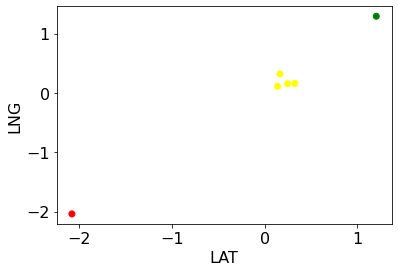

In [190]:
%matplotlib inline

plt.rcParams['font.size']=16

colors = np.array(['red','yellow','green','black','white','orange','brown',
                  '#4A4AFF','#0080FF','#00E3E3','#02F78E','#00EC00',
                  '#8CEA00','#C4C400','#D9B300','#FF8000','#F75000',
                  '#984B4B','#949449','#4F9D9D','#7373B9','#9F4D95'])

plt.scatter(k["b.location_lat"],k["b.location_lng"],c=colors[k["cluster_db"]])

plt.xlabel("LAT")
plt.ylabel("LNG")

In [191]:
dfs = dfm[dfm['_c1'].isin(['939829ba892d138f3eb0e4c85cbaa9da'])]

In [194]:
zb = dfs[['b.location_lat','b.location_lng']]

In [195]:
zb

,b.location_lat,b.location_lng
32,34.138304,115.318849
33,34.139071,115.319287
34,34.139426,115.319467
35,34.139126,115.319257
36,34.139099,115.319256
37,34.139062,115.319248
